In [9]:
#Import required packages
import pandas as pd
import numpy as np

In [10]:
Smote_df=pd.read_csv('/Users/Haridut/Documents/visionzero -LA/More_features1_smote.csv')
for i in Smote_df.columns:
    Smote_df[i]=Smote_df[i].astype(object)



In [11]:
X=Smote_df.drop('NUMBER_KILLED',axis=1)
X=pd.get_dummies(X,drop_first=True)
y=Smote_df['NUMBER_KILLED']
y=list(y.values)

In [12]:
#Performing a  Grid Search to find out the best maximum depth of trees:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid={'max_depth':[3,4,5,6,7,8,9]}
grid_clf_recall=GridSearchCV(DecisionTreeClassifier(random_state=0),param_grid=param_grid,scoring='recall',cv=5)
grid_clf_recall.fit(X,y)
print('Grid best parameter (max. accuracy): ', grid_clf_recall.best_params_)
print('Grid best score (recall): ', grid_clf_recall.best_score_)

Grid best parameter (max. accuracy):  {'max_depth': 9}
Grid best score (recall):  0.911718241603


In [17]:
grid_clf_recall.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [5]:
#Splitting the features and target variables
#Dividing the datset into training and test data set by train_test_split method in sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [6]:
#For Visualization sake, lets fit a model with max_depth = 5 ( 9 would be tough to interpret)
dcstree=DecisionTreeClassifier(random_state=0,max_depth=5).fit(X_train,y_train)
# Output Confusion Matrix on test set 
from sklearn.metrics import confusion_matrix
predictions=dcstree.predict(X_test)
print ('Confusion Matrix: \n')
cf=confusion_matrix(y_test,predictions)
print('True Negatives: '+str(cf[0][0]))
print('True Positives: '+str(cf[1][1]))
print('False Positives: '+str(cf[0][1]))
print('False Negative: '+str(cf[1][0]))
print('\nThere are ' +str(cf[1][0]) +' cases out of the '+str(cf[0][0]+cf[1][1]+cf[0][1]+cf[1][0]) +' cases where there was a fatality but\ndecision tree predicted no fatality')
# Output a classification report with precision and recall
from sklearn.metrics import classification_report
target_names = ['Non-Fatality','Fatality']
print('\n \n Classification Report: \n')
print(classification_report(y_test,predictions,target_names=target_names))

Confusion Matrix: 

True Negatives: 29716
True Positives: 19198
False Positives: 1568
False Negative: 2103

There are 2103 cases out of the 52585 cases where there was a fatality but
decision tree predicted no fatality

 
 Classification Report: 

              precision    recall  f1-score   support

Non-Fatality       0.93      0.95      0.94     31284
    Fatality       0.92      0.90      0.91     21301

 avg / total       0.93      0.93      0.93     52585



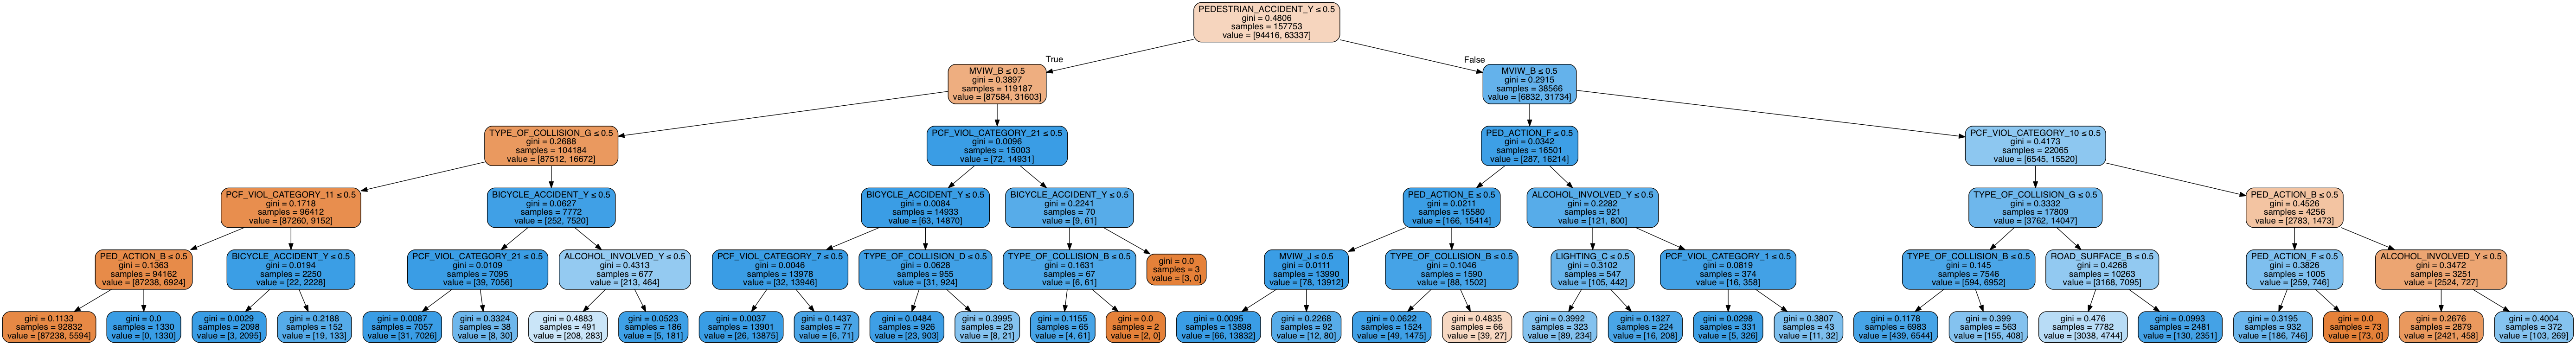

In [54]:
#Visualizing the tree
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
from IPython.display import Image  
dot_data = tree.export_graphviz(dcstree, out_file=None, 
                         feature_names=X.columns,    
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 
#plt.savefig('DecisionTree_MoreFeatures')

In [39]:
import matplotlib.pyplot as plt
import os
%matplotlib inline
from sklearn.tree import export_graphviz
export_graphviz(dcstree,
                feature_names=X.columns,
                filled=True,
                rounded=True)
os.system('dot -Tpng tree.dot -o tree.png')

//anaconda/lib/python3.5/site-packages/sklearn/tree/export.py:386: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)


0

In [7]:
#Now Lets try for the best depth classifier max_depth=9
#For Visualization sake, lets fit a model with max_depth = 5 ( 9 would be tough to interpret)
dcstree=DecisionTreeClassifier(random_state=0,max_depth=9).fit(X_train,y_train)
# Output Confusion Matrix on test set 
from sklearn.metrics import confusion_matrix
predictions=dcstree.predict(X_test)
print ('Confusion Matrix: \n')
cf=confusion_matrix(y_test,predictions)
print('True Negatives: '+str(cf[0][0]))
print('True Positives: '+str(cf[1][1]))
print('False Positives: '+str(cf[0][1]))
print('False Negative: '+str(cf[1][0]))
print('\nThere are ' +str(cf[1][0]) +' cases out of the '+str(cf[0][0]+cf[1][1]+cf[0][1]+cf[1][0]) +' cases where there was a fatality but\ndecision tree predicted no fatality')
# Output a classification report with precision and recall
from sklearn.metrics import classification_report
target_names = ['Non-Fatality','Fatality']
print('\n \n Classification Report: \n')
print(classification_report(y_test,predictions,target_names=target_names))

Confusion Matrix: 

True Negatives: 30782
True Positives: 19485
False Positives: 502
False Negative: 1816

There are 1816 cases out of the 52585 cases where there was a fatality but
decision tree predicted no fatality

 
 Classification Report: 

              precision    recall  f1-score   support

Non-Fatality       0.94      0.98      0.96     31284
    Fatality       0.97      0.91      0.94     21301

 avg / total       0.96      0.96      0.96     52585



In [13]:
# Feature importance in the decision tree implemented
feature_imp =dcstree.feature_importances_
#Sort the values of feature importances from high to low and return their indices
top5_feature=feature_imp.argsort()[::-1][:10]
#Extract the names of the features corresponding to index in top5_features
feature_names=[]
for i in top5_feature:
    feature_names.append((X_train.columns[i],feature_imp[i]))
print('Features and their importance \n')
for i in range(len(feature_names)):
    print(str(feature_names[i][0] +' : ' +str(feature_names[i][1])))

Features and their importance 

MVIW_B : 0.305940477266
PEDESTRIAN_ACCIDENT_Y : 0.280521603237
TYPE_OF_COLLISION_G : 0.178959447207
PCF_VIOL_CATEGORY_11 : 0.0585286087683
PED_ACTION_B : 0.0429477111799
PCF_VIOL_CATEGORY_10 : 0.0302551977812
PED_ACTION_D : 0.0218755949152
PED_ACTION_F : 0.0186535428845
PED_ACTION_E : 0.0165419677386
ALCOHOL_INVOLVED_Y : 0.0108257118013
